In [1]:
# We start by getting access to the drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import sys,os
# change directory
%cd '/content/drive/My Drive'
# Let's import the python module exercises.py  to have access to its functions and Classes
path_to_module='/content/drive/My Drive/segmentation_codes/'
sys.path.append(os.path.abspath(path_to_module))
import utils, config, model 

/content/drive/My Drive


In [3]:
import torch
# import argparse
import cv2
import os

# from utils import get_segment_labels, draw_segmentation_map, image_overlay
from PIL import Image
# from config import ALL_CLASSES
# from model import prepare_model
from google.colab.patches import cv2_imshow

Image 1


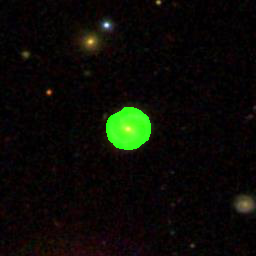

Image 2


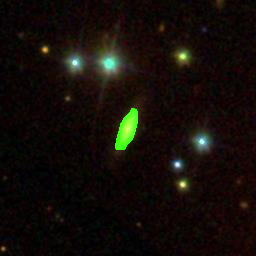

Image 3


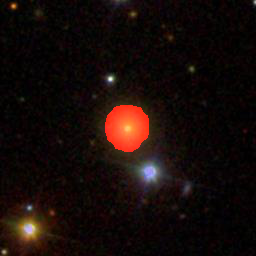

Image 4


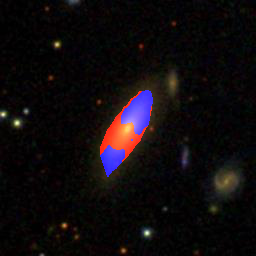

Image 5


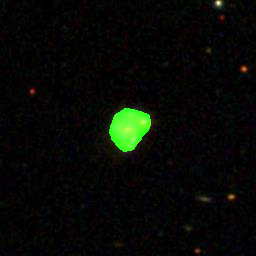

In [4]:
# Construct the argument parser.
'''
parser = argparse.ArgumentParser()
parser.add_argument('-i', '--input', help='path to input dir')
args = parser.parse_args()
'''
out_dir = '/content/drive/My Drive/segmentation_codes/outputs/'
out_dir = os.path.join(out_dir, 'inference_results')
os.makedirs(out_dir, exist_ok=True)

# Set computation device.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.prepare_model(len(config.ALL_CLASSES))
ckpt = torch.load('/content/drive/My Drive/segmentation_codes/outputs/best_model.pth')
model.load_state_dict(ckpt['model_state_dict'])
model.eval().to(device)

input = '/content/drive/My Drive/galaxy_segmentation/test_images_red'
all_image_paths = os.listdir(input)
for i, image_path in enumerate(all_image_paths):
    print(f"Image {i+1}")
    # Read the image.
    image = Image.open(os.path.join(input, image_path))

    # Resize very large images (if width > 1024.) to avoid OOM on GPUs.
    if image.size[0] > 1024:
        image = image.resize((800, 800))

    # Do forward pass and get the output dictionary.
    outputs = utils.get_segment_labels(image, model, device)
    # Get the data from the `out` key.
    outputs = outputs['out']
    segmented_image = utils.draw_segmentation_map(outputs)
    
    final_image = utils.image_overlay(image, segmented_image)
    cv2_imshow(final_image)
    cv2.waitKey(1)
    cv2.imwrite(os.path.join(out_dir, image_path), final_image)